## Handwritten Digits Classification
### This project takes input digits as form of images of size (28*28) and recognises the digits it represents. The range of output is [0,9] through Deep Learning and ANN(Artificial Neural Networks)

### Importing the required packages

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras

## Loading the dataset from Keras. and storing it in 'df'

In [30]:
df = keras.datasets.mnist.load_data()

### Tuple unpacking of df into train and test sets

In [31]:
train,test = df

### Further tuple unpacking of train and test set into features and label vectors

In [32]:
X_train, y_train = train
X_test, y_test = test

### Observing the number of training and test sets and its dimension

In [33]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

#### Observing the number shape of label vector as it contains the digits.

In [34]:
y_train.shape

(60000,)

### Visualising a input image

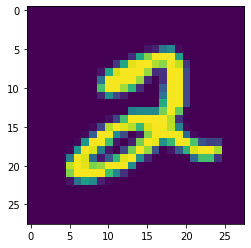

In [35]:
plt.imshow(X_train[5])

### Flattening of input images into vectors of shape(784,)

In [36]:
X_train_flatten = X_train.reshape(60000,784).astype('float32')/255
X_test_flatten = X_test.reshape(10000,784).astype('float32')/255

### Observing the shapes of flattened train and test sets

In [37]:
X_train_flatten.shape, X_test_flatten.shape

((60000, 784), (10000, 784))

### Builiding a model in keras using an input layer, 2 hidden layers and an output layer
### with 64 nodes in first hidden layers with activation function 'relu', 25 nodes in second hidden layer with activation function 'relu' and 10 nodes in output layer with activation function 'softmax' corresponding the 10 digits [0,9].

In [38]:
from keras import layers
inp = keras.Input(shape=(784,))
x = layers.Dense(64,activation='relu')(inp)
x = layers.Dense(25,activation='relu')(x)
out = layers.Dense(10,activation='softmax')(x)
model = keras.Model(inputs=inp,outputs=out,name='model1')
model.summary()



Model: "model1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_5 (Dense)              (None, 25)                1625      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                260       
Total params: 52,125
Trainable params: 52,125
Non-trainable params: 0
_________________________________________________________________


### Model is prepared.

### Model is compiled with 'Adam' optimizer. and using losses as 'SparseCategoricalCrossentropy' and then the input is trained using batch_size of 64 and validation split of 0.2 with 4 epochs.

In [39]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer=keras.optimizers.Adam(),metrics=["accuracy"])
his = model.fit(X_train_flatten,y_train,batch_size=64,epochs=4,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/4
48000/48000 [==============================] - 3s 67us/step - loss: 1.6994 - accuracy: 0.7804 - val_loss: 1.6253 - val_accuracy: 0.8407
Epoch 2/4
48000/48000 [==============================] - 3s 62us/step - loss: 1.5538 - accuracy: 0.9149 - val_loss: 1.5215 - val_accuracy: 0.9439
Epoch 3/4
48000/48000 [==============================] - 3s 63us/step - loss: 1.5185 - accuracy: 0.9469 - val_loss: 1.5144 - val_accuracy: 0.9506
Epoch 4/4
48000/48000 [==============================] - 3s 64us/step - loss: 1.5089 - accuracy: 0.9560 - val_loss: 1.5115 - val_accuracy: 0.9532


### Analysing the test set using the model , its loss and accuracy.

In [40]:
test_scores = model.evaluate(X_test_flatten,y_test,verbose=2)
print("Loss: " + str(test_scores[0]))
print("Accuracy: " + str(test_scores[1]))

Loss: 1.5121767868041993
Accuracy: 0.9502000212669373


###  The model gives us about 95% accuracy on test set and about 95% accuracy on training set. 

In [41]:
mm = model.predict(X_test_flatten)
res = np.argmax(mm[6])
print("the 7th test set label : " + str(y_test[6]))
print("The predicted softmax values of 7th test example : " + str(mm[6]))
print("The predicted label : " + str(res))

the 7th test set label : 4
The predicted softmax values of 7th test example : [2.5605973e-10 1.9405773e-12 1.5114505e-11 5.0191975e-09 9.9990177e-01
 3.2877109e-05 2.9435471e-08 6.8906377e-07 5.7107474e-05 7.4577251e-06]
The predicted label : 4


### HyperParameter Tuning:

### 1. Changing the optimiser from 'Adam' to 'RMSprop' 

In [42]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer=keras.optimizers.RMSprop(),metrics=["accuracy"])
his = model.fit(X_train_flatten,y_train,batch_size=64,epochs=4,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/4
48000/48000 [==============================] - 3s 64us/step - loss: 1.5026 - accuracy: 0.9618 - val_loss: 1.5044 - val_accuracy: 0.9596
Epoch 2/4
48000/48000 [==============================] - 3s 61us/step - loss: 1.4981 - accuracy: 0.9655 - val_loss: 1.5033 - val_accuracy: 0.9601
Epoch 3/4
48000/48000 [==============================] - 3s 62us/step - loss: 1.4950 - accuracy: 0.9689 - val_loss: 1.5050 - val_accuracy: 0.9578
Epoch 4/4
48000/48000 [==============================] - 4s 80us/step - loss: 1.4918 - accuracy: 0.9714 - val_loss: 1.5011 - val_accuracy: 0.9612


In [43]:
test_scores = model.evaluate(X_test_flatten,y_test,verbose=2)
print("Loss: " + str(test_scores[0]))
print("Accuracy: " + str(test_scores[1]))

Loss: 1.5006655630111694
Accuracy: 0.9623000025749207


### Changing the optimizer increased the test set and training set accuracy to about 96.12% and 96.2% respectively 

### Changing the batch size and epoch

In [27]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer=keras.optimizers.RMSprop(),metrics=["accuracy"])
his = model.fit(X_train_flatten,y_train,batch_size=64,epochs=6,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/6
48000/48000 [==============================] - 3s 68us/step - loss: 2.3611 - accuracy: 0.1000 - val_loss: 2.3656 - val_accuracy: 0.0956
Epoch 2/6
48000/48000 [==============================] - 3s 63us/step - loss: 2.3611 - accuracy: 0.1000 - val_loss: 2.3656 - val_accuracy: 0.0956
Epoch 3/6
48000/48000 [==============================] - 3s 64us/step - loss: 2.3611 - accuracy: 0.1000 - val_loss: 2.3656 - val_accuracy: 0.0956
Epoch 4/6
48000/48000 [==============================] - 3s 60us/step - loss: 2.3611 - accuracy: 0.1000 - val_loss: 2.3656 - val_accuracy: 0.0956
Epoch 5/6
48000/48000 [==============================] - 3s 66us/step - loss: 2.3611 - accuracy: 0.1000 - val_loss: 2.3656 - val_accuracy: 0.0956
Epoch 6/6
48000/48000 [==============================] - 3s 70us/step - loss: 2.3611 - accuracy: 0.1000 - val_loss: 2.3656 - val_accuracy: 0.0956


### previous model was better with 96% accuracy

### Determining the predicted digits.

In [45]:
pred = model.predict(X_test_flatten)
for i in pred:
    print(np.argmax(i))

7
2
1
0
4
1
4
9
5
9
0
6
9
0
1
5
9
7
3
4
9
6
6
5
4
0
7
4
0
1
3
1
3
4
7
2
7
1
3
1
1
7
4
2
3
5
1
2
4
4
6
3
5
5
6
0
4
1
9
5
7
8
9
3
7
4
6
4
3
0
7
0
2
9
1
7
3
2
9
7
7
6
2
7
8
4
7
3
6
1
3
6
9
3
1
4
1
7
6
9
6
0
5
4
5
9
2
1
9
4
8
7
3
9
7
4
4
4
9
2
5
4
7
6
7
9
0
5
8
5
6
6
5
7
8
1
0
1
6
4
6
7
3
1
7
1
8
2
0
9
9
8
5
5
1
5
6
0
3
4
4
6
5
4
6
5
4
5
1
4
4
7
2
3
2
7
1
8
1
8
1
8
5
0
8
9
2
5
0
1
1
1
0
9
0
3
1
6
4
2
3
6
1
1
1
3
9
5
2
9
4
5
9
3
9
0
3
6
5
5
7
2
2
7
1
2
8
4
1
7
3
3
8
8
7
9
2
2
4
1
5
8
8
7
2
3
0
6
4
2
4
1
9
5
7
7
2
8
2
0
8
5
7
7
9
1
8
1
8
0
3
0
1
9
3
4
1
8
2
1
2
9
7
5
9
2
6
4
1
5
8
2
9
2
0
4
0
0
2
8
4
7
1
2
4
0
2
7
4
3
3
0
0
3
1
9
6
5
2
5
8
7
9
3
0
4
2
0
7
1
1
2
1
5
3
3
4
7
8
6
5
6
1
3
8
1
0
5
1
3
1
5
0
6
1
8
5
1
7
8
4
6
2
2
5
0
6
5
6
3
7
2
0
8
8
5
4
1
1
4
0
7
3
7
6
1
6
2
1
9
2
8
6
1
9
5
2
5
4
4
2
8
3
8
2
4
5
0
3
1
7
7
5
7
9
7
1
9
2
1
4
2
9
2
0
4
9
1
4
8
1
8
4
5
9
8
8
3
7
6
0
0
3
0
2
0
6
4
8
3
3
3
2
3
9
1
2
6
8
0
5
6
6
6
3
8
8
2
7
5
8
9
6
1
8
4
1
2
8
9
1
9
7
5
4
0
8
9
9
1
0
5
2
3
7
8
9
4
0
6


### Analysing the misclassified digits

In [61]:
lis = []
for i in range(len(pred)):
    if np.argmax(pred[i]) == y_test[i]:
        print("True")
    else:
        lis.append(i)
        print("False")

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
T

### An example of misclassified digit.

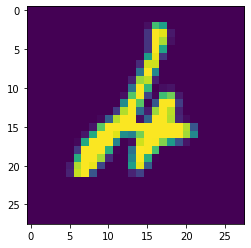

In [62]:
plt.imshow(X_test[lis[5]])